# Machine Learning Engineer Nanodegree
## Capstone Project: Applying machine learning for temporomandibular disorders diagnosis

This notebook contains all code developed to achive goals described in ** *proposal.pdf* ** and it's been the main source to write ** *report.pdf* **. All needed resources to execute this code are available in https://github.com/manolomaldonado/udacity_capstone_project 

# Data exploration

## Data import

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display 
import visuals as vs
import seaborn as sns; sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances_argmin, silhouette_score, accuracy_score
from sklearn.mixture import GaussianMixture
from keras import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint  
%matplotlib inline 

Using TensorFlow backend.


In [2]:
# Load the dataset
try:
    dataset = pd.read_csv("data/tmd_data.csv")
    print("Patients dataset has {} samples with {} features each.".format(*dataset.shape))
except Exception as e:
    s = str(e)
    print("Dataset could not be loaded. Is the dataset missing?", s)

Patients dataset has 681 samples with 401 features each.


Lets take a first look to dataset. We are interested in knowing number, type, range of values and empty parameters in order to take further decissions about

In [3]:
dataset.head(10)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q392,Q393,Q394,Q395,Q396,Q397,Q398,Q399,Q400,Label
0,1,1,0,1,0,1,1,0,1,2,...,0,0,1,0,1,0,1,0,0,Cefaleas/TMD
1,1,0,1,1,1,1,1,1,1,6,...,1,0,1,0,1,0,1,0,0,DM. Referido
2,0,0,0,0,0,0,0,1,0,3,...,1,1,1,1,0,1,0,0,0,DDSRSLA
3,0,0,0,1,0,0,0,0,1,4,...,1,0,1,0,1,1,1,0,0,DDCRCBI
4,1,0,0,0,1,1,0,0,0,5,...,1,0,0,1,1,1,0,0,1,DDSRCLA
5,0,0,0,0,0,0,0,0,0,2,...,1,1,0,0,0,1,1,0,0,DDCR
6,1,1,1,1,1,1,1,1,1,3,...,0,0,0,1,1,1,0,0,0,Mialgia
7,1,0,1,1,1,1,1,1,1,2,...,1,0,0,1,1,1,0,0,1,Mialgia Local
8,0,0,0,0,0,0,0,0,1,7,...,1,0,1,1,0,0,1,1,0,DDCR
9,1,0,1,1,1,1,1,1,1,3,...,0,0,0,0,1,0,1,0,1,Artralgia


In [4]:
# All empty columns are going to be dropped out later
null_columns=dataset.columns[dataset.isnull().all()]
# One single value columns are good candidates to get rid off them
one_value_params = []
# Integer (non-boolean) values columns are likely to be regularized later
int_value_params = []

for i in range(0, len(dataset.columns)) :
    column = dataset.columns[i]
    print("Column ", column, 'has ', len(dataset[column].unique()),' different values of type ',dataset[column].dtype)
    if len(dataset[column].unique()) == 1 : 
        one_value_params.append(column)
    elif len(dataset[column].unique()) > 2 : 
        int_value_params.append(column)
    


Column  Q1 has  2  different values of type  int64
Column  Q2 has  2  different values of type  int64
Column  Q3 has  2  different values of type  int64
Column  Q4 has  2  different values of type  int64
Column  Q5 has  2  different values of type  int64
Column  Q6 has  2  different values of type  int64
Column  Q7 has  2  different values of type  int64
Column  Q8 has  2  different values of type  int64
Column  Q9 has  2  different values of type  int64
Column  Q10 has  7  different values of type  int64
Column  Q11 has  2  different values of type  int64
Column  Q12 has  2  different values of type  int64
Column  Q13 has  2  different values of type  int64
Column  Q14 has  2  different values of type  int64
Column  Q15 has  2  different values of type  int64
Column  Q16 has  2  different values of type  int64
Column  Q17 has  2  different values of type  int64
Column  Q18 has  2  different values of type  int64
Column  Q19 has  7  different values of type  int64
Column  Q20 has  2  d

Column  Q161 has  12  different values of type  int64
Column  Q162 has  10  different values of type  int64
Column  Q163 has  2  different values of type  int64
Column  Q164 has  2  different values of type  int64
Column  Q165 has  2  different values of type  int64
Column  Q166 has  2  different values of type  int64
Column  Q167 has  2  different values of type  int64
Column  Q168 has  2  different values of type  int64
Column  Q169 has  2  different values of type  int64
Column  Q170 has  2  different values of type  int64
Column  Q171 has  2  different values of type  int64
Column  Q172 has  2  different values of type  int64
Column  Q173 has  2  different values of type  int64
Column  Q174 has  2  different values of type  int64
Column  Q175 has  2  different values of type  int64
Column  Q176 has  1  different values of type  int64
Column  Q177 has  2  different values of type  int64
Column  Q178 has  1  different values of type  int64
Column  Q179 has  2  different values of typ

Column  Q396 has  2  different values of type  int64
Column  Q397 has  2  different values of type  int64
Column  Q398 has  2  different values of type  int64
Column  Q399 has  2  different values of type  int64
Column  Q400 has  2  different values of type  int64
Column  Label has  11  different values of type  object


In [5]:
display(dataset.describe())
# Remove 'Label' from values as data is going to be splited
int_value_params.remove('Label')
print("Empty columns ", null_columns)
print("Only one different value columns ", one_value_params)
print("Int value params", int_value_params)


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q391,Q392,Q393,Q394,Q395,Q396,Q397,Q398,Q399,Q400
count,681.00000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,...,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,0.63583,0.349486,0.355360,0.555066,0.509545,0.538913,0.506608,0.475771,0.725404,3.809104,...,0.646109,0.509545,0.484581,0.550661,0.618209,0.609398,0.534508,0.475771,0.248164,0.283407
std,0.48155,0.477158,0.478974,0.497324,0.500276,0.498850,0.500324,0.499780,0.446639,1.945275,...,0.478527,0.500276,0.500130,0.497792,0.486183,0.488244,0.499174,0.499780,0.432265,0.450983
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Empty columns  Index(['Q74', 'Q76', 'Q78', 'Q80', 'Q82', 'Q84', 'Q86', 'Q88', 'Q90', 'Q92',
       'Q94', 'Q96', 'Q100', 'Q101', 'Q102'],
      dtype='object')
Only one different value columns  ['Q74', 'Q76', 'Q78', 'Q80', 'Q82', 'Q84', 'Q86', 'Q88', 'Q90', 'Q92', 'Q94', 'Q96', 'Q100', 'Q101', 'Q102', 'Q131', 'Q133', 'Q135', 'Q137', 'Q152', 'Q154', 'Q156', 'Q158', 'Q176', 'Q178', 'Q180', 'Q182', 'Q197', 'Q199', 'Q201', 'Q203', 'Q210', 'Q212', 'Q218', 'Q220', 'Q222', 'Q224', 'Q349', 'Q350', 'Q352', 'Q353', 'Q355', 'Q356', 'Q358', 'Q359', 'Q362', 'Q365', 'Q368', 'Q371']
Int value params ['Q10', 'Q19', 'Q49', 'Q50', 'Q51', 'Q103', 'Q104', 'Q105', 'Q106', 'Q107', 'Q108', 'Q114', 'Q115', 'Q116', 'Q160', 'Q161', 'Q162']


After a first look to parameters list we could deduce: 
- Most of parameters, apart from label and the ones described below, have bool values
- Parameters ['Q74', 'Q76', 'Q78', 'Q80', 'Q82', 'Q84', 'Q86', 'Q88', 'Q90', 'Q92', 'Q94', 'Q96', 'Q100', 'Q101', 'Q102', 'Q131', 'Q133', 'Q135', 'Q137', 'Q152', 'Q154', 'Q156', 'Q158', 'Q176', 'Q178', 'Q180', 'Q182', 'Q197', 'Q199', 'Q201', 'Q203', 'Q210', 'Q212', 'Q218', 'Q220', 'Q222', 'Q224', 'Q349', 'Q350', 'Q352', 'Q353', 'Q355', 'Q356', 'Q358', 'Q359', 'Q362', 'Q365', 'Q368', 'Q371'] have only one different value so probably they are good candidates for being removed from dataset without impact in results
- Parameters ['Q74', 'Q76', 'Q78', 'Q80', 'Q82', 'Q84', 'Q86', 'Q88', 'Q90', 'Q92','Q94', 'Q96', 'Q100', 'Q101', 'Q102'] have no value at all, so we can delete them
- Parameter ['Q10', 'Q19', 'Q49', 'Q50', 'Q51', 'Q103', 'Q104', 'Q105', 'Q106', 'Q107', 'Q108', 'Q114', 'Q115', 'Q116', 'Q160', 'Q161', 'Q162'] of int type are susceptible for regularizarion later

There is no need for on hot encoding as there are not string valued parameters. We'll perform it later with 'Label' dataset in the prediction section.

Let's see graphically which is the disease distribution inside dataset.

>**Note:** Given that we are dealing with almost 400 features, it's not possible to generate a readable graphical representation of features, relations between them or heat maps.


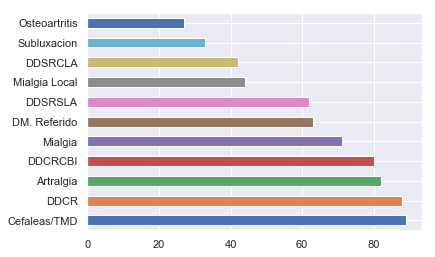

In [6]:
dataset['Label'].value_counts()[:20].plot(kind='barh')

## Data preprocessing

In [10]:
# Split the data into features and target label
diagnosis_raw = dataset['Label']
features_raw = dataset.drop('Label', axis = 1)
# Get number of deseases. We are going to use it for, for instance, set the output layer size in the prediction section
number_of_diseases = len(diagnosis_raw.unique())

Lets remove empty columns and the apply log transform to numerical values to ensure all values are in range [0,1]

In [11]:
# Remove empty columns
features_raw = features_raw.drop(null_columns, axis=1)
features_raw.head(10)
# Log transform numerical value colums
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[int_value_params] = features_raw[int_value_params].apply(lambda x: np.log(x + 1))

scaler = MinMaxScaler() # default=(0, 1)

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[int_value_params] = scaler.fit_transform(features_log_transformed[int_value_params])

display(features_log_minmax_transform.head(n = 5))

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q391,Q392,Q393,Q394,Q395,Q396,Q397,Q398,Q399,Q400
0,1,1,0,1,0,1,1,0,1,0.292481,...,1,0,0,1,0,1,0,1,0,0
1,1,0,1,1,1,1,1,1,1,0.903677,...,0,1,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0.500000,...,1,1,1,1,1,0,1,0,0,0
3,0,0,0,1,0,0,0,0,1,0.660964,...,1,1,0,1,0,1,1,1,0,0
4,1,0,0,0,1,1,0,0,0,0.792481,...,0,1,0,0,1,1,1,0,0,1


# Unsupervised Learning
We are going to use unsupervised learnig techniques in order to avhieve 2 of the main goals of the projects.
- To remove those questions that has no impact on patient diagnosis. 
- Determine, using clustering, those patients susceptible to be diagnosed with 2 or more diseases


## Coefficient of determination

In [12]:
# By calculating the coefficient of determination, R^2 of every single feature. Values close to 1 mean that that feature is likely to be predicted using the other features
dataset = features_log_minmax_transform
delete_candidates = []

for i in range(0, len(dataset.columns)) :
    new_data = dataset.drop(dataset.columns[i], axis = 1)

    # Split the data into training and testing sets(0.2) using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, dataset[dataset.columns[i]], test_size=0.2, random_state = 42)

    # Fitting training set with decision tree regressor 
    regressor = DecisionTreeRegressor(random_state = 42)
    regressor.fit(X_train,y_train)

    # Get the score of the prediction using the testing set
    score = regressor.score(X_test,y_test)
    # Get values of R^2 score above 0.5
    # Store selected parameters
    if score > 0.9 :
        print(dataset.columns[i], score)
        delete_candidates.append(dataset.columns[i])

Q119 1.0
Q121 1.0
Q123 1.0
Q125 1.0
Q127 1.0
Q129 1.0
Q131 1.0
Q133 1.0
Q135 1.0
Q137 1.0
Q140 1.0
Q142 1.0
Q144 1.0
Q146 1.0
Q148 1.0
Q152 1.0
Q154 1.0
Q156 1.0
Q158 1.0
Q172 0.9656641604010024
Q176 1.0
Q178 1.0
Q180 1.0
Q182 1.0
Q193 0.931328320802005
Q197 1.0
Q199 1.0
Q201 1.0
Q203 1.0
Q208 0.92175899486008
Q210 1.0
Q212 1.0
Q216 0.908869179600887
Q218 1.0
Q220 1.0
Q222 1.0
Q224 1.0
Q286 0.9150124069478908
Q296 1.0
Q300 1.0
Q304 1.0
Q307 0.9093915343915344
Q308 1.0
Q312 1.0
Q316 1.0
Q320 1.0
Q323 1.0
Q325 1.0
Q326 1.0
Q329 1.0
Q332 1.0
Q335 1.0
Q337 1.0
Q340 1.0
Q343 1.0
Q346 1.0
Q349 1.0
Q350 1.0
Q352 1.0
Q353 1.0
Q355 1.0
Q356 1.0
Q358 1.0
Q359 1.0
Q362 1.0
Q365 1.0
Q368 1.0
Q371 1.0


## Detecting Outliers

For those features with non boolean values, we are going to detect and remove outliers

In [15]:
# For each integer feature find the data points with extreme high or low values
# List to store outliers detected in loop
all_outliers = []
for feature in int_value_params :
    
    Q1 = np.percentile(dataset[feature], 25)
    Q3 = np.percentile(dataset[feature], 75)
    step = (Q3 - Q1)*1.5
    
    feature_outliers = dataset[~((dataset[feature] >= Q1 - step) & (dataset[feature] <= Q3 + step))]
    if len(feature_outliers) == 0 :
        continue
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(feature_outliers)
    
    all_outliers.extend(feature_outliers.index.values)
    
import collections
outliers =  [item for item, count in collections.Counter(all_outliers).items() if count > 1]
print('Outliers detected in more than one feature')
print(len(outliers))

# Remove the outliers present in more than one feature, if any were specified
good_data = dataset.drop(dataset.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Q114':


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q391,Q392,Q393,Q394,Q395,Q396,Q397,Q398,Q399,Q400
72,1,0,1,1,1,1,1,1,1,0.000000,...,1,1,1,1,0,0,0,0,0,0
210,1,0,1,1,1,1,1,1,1,0.292481,...,1,1,0,1,0,0,0,0,1,0
251,1,0,0,1,1,1,1,1,1,0.500000,...,0,1,0,1,1,1,0,1,1,0
356,1,0,1,1,1,1,1,1,1,0.500000,...,0,1,1,0,1,1,0,0,0,0
401,1,1,1,0,1,1,1,1,1,0.292481,...,1,1,0,1,0,1,1,1,0,0
449,1,1,1,1,1,1,1,1,1,0.500000,...,1,1,0,0,0,1,1,1,1,1


Data points considered outliers for the feature 'Q116':


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q391,Q392,Q393,Q394,Q395,Q396,Q397,Q398,Q399,Q400
2,0,0,0,0,0,0,0,1,0,0.500000,...,1,1,1,1,1,0,1,0,0,0
14,1,1,0,0,1,1,1,1,1,0.660964,...,0,0,0,1,0,0,1,1,0,1
16,0,0,0,0,0,0,0,0,0,0.792481,...,1,1,1,1,0,1,1,1,0,1
29,0,0,0,0,0,0,0,0,0,0.000000,...,0,1,0,1,0,1,1,0,0,0
31,1,0,1,0,0,1,0,0,1,1.000000,...,1,1,1,1,1,0,0,0,1,1
38,0,0,0,0,0,0,0,1,0,0.292481,...,1,1,0,0,1,1,1,0,1,0
45,0,0,0,0,1,1,1,0,0,0.903677,...,1,1,1,0,1,0,1,0,0,0
49,0,0,0,0,0,0,1,0,1,0.903677,...,0,1,0,0,0,0,1,1,1,1
67,1,0,0,1,0,1,1,0,0,1.000000,...,1,1,1,0,0,0,0,0,0,1
70,0,1,0,0,1,0,0,1,0,1.000000,...,1,1,0,1,1,1,0,0,0,0


Data points considered outliers for the feature 'Q160':


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q391,Q392,Q393,Q394,Q395,Q396,Q397,Q398,Q399,Q400
3,0,0,0,1,0,0,0,0,1,0.660964,...,1,1,0,1,0,1,1,1,0,0
10,0,0,0,0,0,0,0,0,1,0.792481,...,1,1,1,1,1,0,0,1,0,0
15,1,0,1,0,1,1,1,1,1,0.500000,...,0,1,0,1,1,1,1,0,1,0
21,0,0,0,1,0,0,0,0,1,0.500000,...,1,0,1,0,1,1,1,1,0,1
29,0,0,0,0,0,0,0,0,0,0.000000,...,0,1,0,1,0,1,1,0,0,0
38,0,0,0,0,0,0,0,1,0,0.292481,...,1,1,0,0,1,1,1,0,1,0
54,1,0,0,1,1,1,1,1,1,0.660964,...,0,0,0,1,0,1,1,0,0,0
65,1,0,0,1,1,1,1,1,1,0.792481,...,1,1,1,0,0,1,0,0,0,1
83,0,0,0,1,0,0,0,0,0,0.903677,...,1,1,0,1,0,0,1,0,0,0
84,1,1,1,0,1,1,1,1,1,0.000000,...,0,0,0,0,0,0,0,1,1,1


Outliers detected in more than one feature
6


## Clustering

We are going to get silhouette score to determine the number of clusters that best fit the used dataset. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [16]:
def score_by_clusters(n) :
    clusterer = GaussianMixture(n_components=n, random_state=42)
    clusterer.fit(dataset)
    preds = clusterer.predict(dataset)
    centers = clusterer.means_ 
    score = silhouette_score(dataset, preds)
    print("Silhouette Score for {} clusters: {}".format(n, score))
    return preds, centers, score
    
for i in range(2,20) : 
    score_by_clusters(i)
#pca_samples = []
#preds, centers, score = score_by_clusters(2)
#vs.cluster_results(dataset, preds, centers, pca_samples)

Silhouette Score for 2 clusters: 0.19491660786947368
Silhouette Score for 3 clusters: 0.16460354968749225
Silhouette Score for 4 clusters: 0.11262365601692015
Silhouette Score for 5 clusters: 0.11907853273704792
Silhouette Score for 6 clusters: 0.08125788920444028
Silhouette Score for 7 clusters: 0.07145906156243764
Silhouette Score for 8 clusters: 0.10916452371813742
Silhouette Score for 9 clusters: 0.11868785153911293
Silhouette Score for 10 clusters: 0.10249801511233597
Silhouette Score for 11 clusters: 0.09144135099828653
Silhouette Score for 12 clusters: 0.09853193844632349
Silhouette Score for 13 clusters: 0.08574637448598268
Silhouette Score for 14 clusters: 0.08538393186031883
Silhouette Score for 15 clusters: 0.0824421618921088
Silhouette Score for 16 clusters: 0.06791007881720222
Silhouette Score for 17 clusters: 0.06222213835835061
Silhouette Score for 18 clusters: 0.054483189236219504
Silhouette Score for 19 clusters: 0.05389040948529145


As we can see, there shilouette score are really low for all number of clusters. This is specially remarkable for n=11, as 11 is the number of diseases to diagnose. This is indicative of clusters overlapping, which is really relevant for the project scope. We'll delve into this circumstance later.

NotImplementedError: ix is not iterable

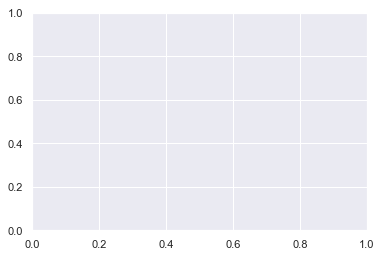

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=number_of_diseases)
kmeans.fit(dataset)
y_kmeans = kmeans.predict(dataset)
centers = kmeans.cluster_centers_

print(dataset.iloc)

plt.scatter(dataset.iloc,dataset.iloc, c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Prediction Model

The main goal of the project is to provide doctors a prediction function that helps them to diagnose a TMD disorder based on patient answers to questionaries. Along previous steps, we have declared a set of variables that are going to be useful for the prediction model.

- **features_raw**: Original features dataset
- **good_data**: Regularized features dataset (without outliers) 
- **diagnosis_raw**: Dataset containing Labels corresponding to features dataset,
- **number_of_diseases**: Number of different diseases to diagnose
- **delete_candidates**: Records with high coefficient of determination
- **one_value_params**: Parameters with just one value along dataset

In [17]:
good_data.head(10)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q391,Q392,Q393,Q394,Q395,Q396,Q397,Q398,Q399,Q400
0,1,1,0,1,0,1,1,0,1,0.292481,...,1,0,0,1,0,1,0,1,0,0
1,1,0,1,1,1,1,1,1,1,0.903677,...,0,1,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0.500000,...,1,1,1,1,1,0,1,0,0,0
3,0,0,0,1,0,0,0,0,1,0.660964,...,1,1,0,1,0,1,1,1,0,0
4,1,0,0,0,1,1,0,0,0,0.792481,...,0,1,0,0,1,1,1,0,0,1
5,0,0,0,0,0,0,0,0,0,0.292481,...,1,1,1,0,0,0,1,1,0,0
6,1,1,1,1,1,1,1,1,1,0.500000,...,1,0,0,0,1,1,1,0,0,0
7,1,0,1,1,1,1,1,1,1,0.292481,...,1,1,0,0,1,1,1,0,0,1
8,0,0,0,0,0,0,0,0,1,1.000000,...,1,1,0,1,1,0,0,1,1,0
9,1,0,1,1,1,1,1,1,1,0.500000,...,0,0,0,0,0,1,0,1,0,1


In [18]:
diagnosis_raw.head(10)

0     Cefaleas/TMD
1     DM. Referido
2          DDSRSLA
3          DDCRCBI
4          DDSRCLA
5             DDCR
6          Mialgia
7    Mialgia Local
8             DDCR
9        Artralgia
Name: Label, dtype: object

## Label dataset one hot encoding

We need to apply one hot encoding to diagnosis labels

In [20]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(diagnosis_raw)
encoded_Y = encoder.transform(diagnosis_raw)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

## Split data into training and testing sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(dataset, dummy_y, test_size=0.3)

## Define the model

In [17]:
classifier = Sequential()
# First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=385))
# Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
# Output Layer
classifier.add(Dense(number_of_diseases, activation='sigmoid', kernel_initializer='random_normal'))
classifier.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 1544      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 11)                55        
Total params: 1,619
Trainable params: 1,619
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compiling the model
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [21]:
epochs = 100
filepath="saved_models/weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
classifier.fit(X_train, y_train, validation_split=0.33, epochs=epochs, batch_size=10, callbacks=callbacks_list, verbose=1)



Train on 318 samples, validate on 158 samples
Epoch 1/100
318/318 [==============================] - 0s 121us/step - loss: 1.8475e-04 - acc: 1.0000 - val_loss: 2.6187e-04 - val_acc: 1.0000

Epoch 00001: val_acc improved from -inf to 1.00000, saving model to saved_models/weights.best.hdf5
Epoch 2/100
318/318 [==============================] - 0s 120us/step - loss: 1.7877e-04 - acc: 1.0000 - val_loss: 2.5996e-04 - val_acc: 1.0000

Epoch 00002: val_acc did not improve from 1.00000
Epoch 3/100
318/318 [==============================] - 0s 116us/step - loss: 1.7338e-04 - acc: 1.0000 - val_loss: 2.5967e-04 - val_acc: 1.0000

Epoch 00003: val_acc did not improve from 1.00000
Epoch 4/100
318/318 [==============================] - 0s 117us/step - loss: 1.6734e-04 - acc: 1.0000 - val_loss: 2.5657e-04 - val_acc: 1.0000

Epoch 00004: val_acc did not improve from 1.00000
Epoch 5/100
318/318 [==============================] - 0s 120us/step - loss: 1.6497e-04 - acc: 1.0000 - val_loss: 2.5497e-04 - va


Epoch 00042: val_acc did not improve from 1.00000
Epoch 43/100
318/318 [==============================] - 0s 118us/step - loss: 7.0326e-05 - acc: 1.0000 - val_loss: 1.8223e-04 - val_acc: 1.0000

Epoch 00043: val_acc did not improve from 1.00000
Epoch 44/100
318/318 [==============================] - 0s 122us/step - loss: 6.9158e-05 - acc: 1.0000 - val_loss: 1.8453e-04 - val_acc: 1.0000

Epoch 00044: val_acc did not improve from 1.00000
Epoch 45/100
318/318 [==============================] - 0s 121us/step - loss: 6.7856e-05 - acc: 1.0000 - val_loss: 1.8052e-04 - val_acc: 1.0000

Epoch 00045: val_acc did not improve from 1.00000
Epoch 46/100
318/318 [==============================] - 0s 118us/step - loss: 6.6646e-05 - acc: 1.0000 - val_loss: 1.8160e-04 - val_acc: 1.0000

Epoch 00046: val_acc did not improve from 1.00000
Epoch 47/100
318/318 [==============================] - 0s 119us/step - loss: 6.5427e-05 - acc: 1.0000 - val_loss: 1.7777e-04 - val_acc: 1.0000

Epoch 00047: val_acc did

318/318 [==============================] - 0s 119us/step - loss: 3.0346e-05 - acc: 1.0000 - val_loss: 1.3403e-04 - val_acc: 1.0000

Epoch 00085: val_acc did not improve from 1.00000
Epoch 86/100
318/318 [==============================] - 0s 117us/step - loss: 2.9759e-05 - acc: 1.0000 - val_loss: 1.3207e-04 - val_acc: 1.0000

Epoch 00086: val_acc did not improve from 1.00000
Epoch 87/100
318/318 [==============================] - 0s 118us/step - loss: 2.9491e-05 - acc: 1.0000 - val_loss: 1.3055e-04 - val_acc: 1.0000

Epoch 00087: val_acc did not improve from 1.00000
Epoch 88/100
318/318 [==============================] - 0s 125us/step - loss: 2.8616e-05 - acc: 1.0000 - val_loss: 1.3431e-04 - val_acc: 1.0000

Epoch 00088: val_acc did not improve from 1.00000
Epoch 89/100
318/318 [==============================] - 0s 124us/step - loss: 2.8072e-05 - acc: 1.0000 - val_loss: 1.3324e-04 - val_acc: 1.0000

Epoch 00089: val_acc did not improve from 1.00000
Epoch 90/100
318/318 [================

## Eval model: accuracy

In [22]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

476/476 [==============================] - 0s 17us/step


[5.3703469691892006e-05, 1.0]

In [37]:
classifier.load_weights('saved_models/weights.best.hdf5')
y_pred=classifier.predict(X_test)
y_pred = (y_pred > 0.5)
accuracy_score(y_test, y_pred)

0.97560975609756095

## Train the model with reduced data

As we have notice in previous steps, there are some features that seem not to have a relevant impact in diagnosis. If we were able to remove those features without affecting model accuracy we would help to collect patients data in an easyer way. We are going to eliminate from dataset:
- One value features
- Those which coefficient od determination is above 0.9

In [33]:
reduced_dataset = dataset
delete = one_value_params + delete_candidates
# Remove duplicates
delete = list(set(delete))
print(reduced_dataset.columns)
for i in range(0, len(reduced_dataset.columns)-1) :
    column = reduced_dataset.columns[i]
    print(column)
    if column in delete : 
        print('mcsc')
        del reduced_dataset[column]

reduced_dataset.describe()

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       ...
       'Q391', 'Q392', 'Q393', 'Q394', 'Q395', 'Q396', 'Q397', 'Q398', 'Q399',
       'Q400'],
      dtype='object', length=317)
Q1
Q2
Q3
Q4
Q5
Q6
Q7
Q8
Q9
Q10
Q11
Q12
Q13
Q14
Q15
Q16
Q17
Q18
Q19
Q20
Q21
Q22
Q23
Q24
Q25
Q26
Q27
Q28
Q29
Q30
Q31
Q32
Q33
Q34
Q35
Q36
Q37
Q38
Q39
Q40
Q41
Q42
Q43
Q44
Q45
Q46
Q47
Q48
Q49
Q50
Q51
Q52
Q53
Q54
Q55
Q56
Q57
Q58
Q59
Q60
Q61
Q62
Q63
Q64
Q65
Q66
Q67
Q68
Q69
Q70
Q71
Q72
Q73
Q75
Q77
Q79
Q81
Q83
Q85
Q87
Q89
Q91
Q93
Q95
Q97
Q98
Q99
Q103
Q104
Q105
Q106
Q107
Q108
Q109
Q110
Q111
Q112
Q113
Q114
Q115
Q116
Q117
Q118
Q120
Q122
Q124
Q126
Q128
Q130
Q132
Q134
Q136
Q138
Q139
Q141
Q143
Q145
Q147
Q149
Q150
Q151
Q153
Q155
Q157
Q159
Q160
Q161
Q162
Q163
Q164
Q165
Q166
Q167
Q168
Q169
Q170
Q171
Q173
Q174
Q175
Q177
Q179
Q181
Q183
Q184
Q185
Q186
Q187
Q188
Q189
Q190
Q191
Q192
Q194
Q195
Q196
Q198
Q200
Q202
Q204
Q205
Q206
Q207
Q209
Q211
Q213
Q214
Q215
Q217
Q219
Q221
Q223
Q225
Q226
Q227
Q228
Q229
Q23

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q391,Q392,Q393,Q394,Q395,Q396,Q397,Q398,Q399,Q400
count,681.00000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,...,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,0.63583,0.349486,0.355360,0.555066,0.509545,0.538913,0.506608,0.475771,0.725404,0.566104,...,0.646109,0.509545,0.484581,0.550661,0.618209,0.609398,0.534508,0.475771,0.248164,0.283407
std,0.48155,0.477158,0.478974,0.497324,0.500276,0.498850,0.500324,0.499780,0.446639,0.322370,...,0.478527,0.500276,0.500130,0.497792,0.486183,0.488244,0.499174,0.499780,0.432265,0.450983
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.292481,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.660964,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.903677,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(recued_dataset, dummy_y, test_size=0.3)
classifier = Sequential()
# First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=385)) ## TODO size ot X_reduced
# Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
# Output Layer
classifier.add(Dense(number_of_diseases, activation='sigmoid', kernel_initializer='random_normal'))

# Compiling the model
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

epochs = 100
filepath="saved_models/weights.reduced.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
classifier.fit(X_train_reduced, y_train, validation_split=0.33, epochs=epochs, batch_size=10, callbacks=callbacks_list, verbose=1)

classifier.load_weights('saved_models/weights.reduced.best.hdf5')
y_pred=classifier.predict(X_test_reduced)
y_pred = (y_pred > 0.5)
accuracy_score(y_test, y_pred)

Accuracy for the preduction model using the reduced set of data is . So one of the project conclussions is that, probably (we don't still know if meaybe new diseases are going to be included), we could make diagnosis predictions using 68 less questions.

## Implement a prediction function

In [61]:
def diagnosis(answers):
    classifier.load_weights('saved_models/weights.best.hdf5')
    predicted_value = classifier.predict(answers)
    return diagnosis_raw[np.argmax(predicted_value)]

print(diagnosis(X_test[:1]))

     Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...   Q391  Q392  Q393  Q394  \
360   1   0   1   1   1   1   1   1   1  0.5  ...      1     0     1     1   

     Q395  Q396  Q397  Q398  Q399  Q400  
360     1     0     1     1     1     0  

[1 rows x 385 columns]
Mialgia
